In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#DEFINIR LA FUNCIÓN DE LA INTEGRAL.
#Puedes cambiar la función de retorno, según tu integral.
def f(x):
    return 1 - x - 4 * x**3 + 2 * x**5

#DEFINIR EL VALOR DE LOS LÍMITES DE INTEGRACIÓN Y EL NÚMERO DE PARTICIONES.
#Puedes cambiar estos valores, según tu problema.
a = -2
b = 4
n = 1

In [10]:
#Método del Trapecio.
x = sp.symbols('x')
funcion = sp.sympify(f(x))

def trapecio(funcion, a, b, n):
    intervalo = (b - a)/n
    s = 0
    m = 0
    a_evaluado = 0
    b_evaluado = 0
    
    for i in range (1, n):
        m = a + (i * intervalo)
        m_evaluado = funcion.evalf(subs = {x : m})
        s = s + m_evaluado
    
    a_evaluado = funcion.evalf(subs = {x : a})
    b_evaluado = funcion.evalf(subs = {x : b})
    result = intervalo/2 * (a_evaluado + 2*s + b_evaluado)
    
    return result

result_trapecio = trapecio(funcion, a, b, n)
print("El resultado con el método del trapecio es de:", result_trapecio)

El resultado con el método del trapecio es de: 5280.00000000000


El resultado con el método del trapecio es de: 5280.00000000000


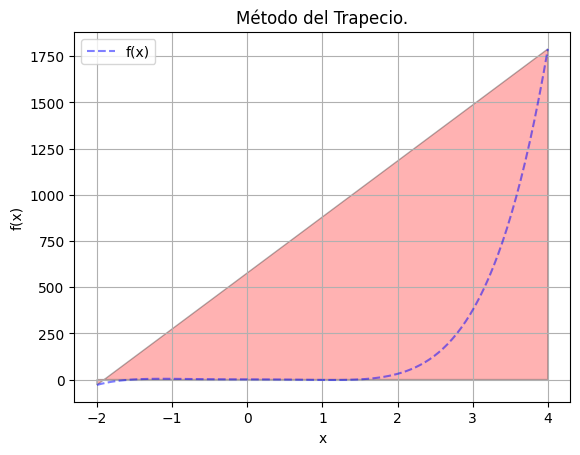

In [11]:
#GRÁFICA DEL MÉTODO DEL TRAPECIO.
x_vals = np.linspace(a, b, 100)
y_vals = np.array([f(xi) for xi in x_vals], dtype=float)

# GENERAR PUNTOS PARA LOS TRAPECIOS
x_trap = np.linspace(a, b, n+1)  # Puntos en el eje x
y_trap = np.array([f(xi) for xi in x_trap], dtype=float)

# GRAFICAR LA FUNCIÓN
plt.plot(x_vals, y_vals, color = 'blue', label = 'f(x)', linestyle = '--', alpha = 0.5)

# DIBUJAR LOS TRAPECIOS
for i in range(n):
    x_trapecio = [x_trap[i], x_trap[i], x_trap[i+1], x_trap[i+1]]
    y_trapecio = [0, y_trap[i], y_trap[i+1], 0]
    plt.fill(x_trapecio, y_trapecio, 'r', alpha=0.3, edgecolor='black')

# AÑADIR DETALLES AL GRÁFICO
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Método del Trapecio.')
plt.legend()
plt.grid()

print("El resultado con el método del trapecio es de:", result_trapecio)

# MOSTRAR GRÁFICO
plt.show()

In [12]:
#SIMPSON 1/3
def simpson_un_tercio(funcion, a, b, n):
    h = (b - a) / n
    suma_impares = 0
    suma_pares = 0
    
    for i in range(1, n):
        xi = a + i * h
        f_xi = funcion.evalf(subs={x: xi})
        
        if i % 2 == 1:
            suma_impares += 4 * f_xi
        else:
            suma_pares += 2 * f_xi
    
    a_evaluado = funcion.evalf(subs={x: a})
    b_evaluado = funcion.evalf(subs={x: b})
    
    resultado = (h / 3) * (a_evaluado + suma_impares + suma_pares + b_evaluado)
    return resultado

result_simpson_un_tercio = simpson_un_tercio(funcion, a, b, n)
print("El resultado con el método de Simpson 1/3 es de:", result_simpson_un_tercio)

El resultado con el método de Simpson 1/3 es de: 3520.00000000000


El resultado con el método de Simpson 1/3 es de: 3520.00000000000


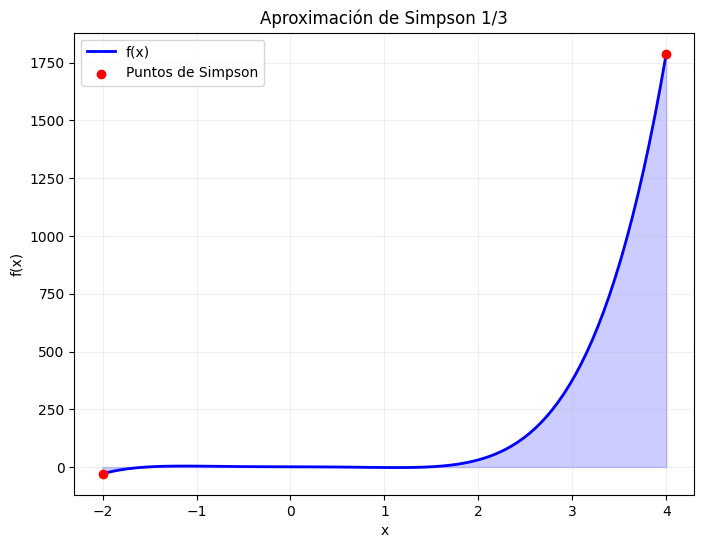

In [13]:
#GRAFICA DE SIMPSON 1/3
f_lambda = sp.lambdify(x, funcion, 'numpy')

x_vals = np.linspace(a, b, 100)
y_vals = f_lambda(x_vals)

h = (b - a) / n
x_approx = np.array([a + i * h for i in range(n+1)])
y_approx = f_lambda(x_approx)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="f(x)", color="blue", linewidth=2)
plt.scatter(x_approx, y_approx, color="red", zorder=5, label="Puntos de Simpson")
plt.fill_between(x_vals, 0, y_vals, color="blue", alpha=0.2)
plt.title("Aproximación de Simpson 1/3")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(alpha = 0.2)

print("El resultado con el método de Simpson 1/3 es de:", result_simpson_un_tercio)

plt.show()

In [14]:
#SIMPSON 3/8
n = 5
def simpson_tres_octavos(funcion, a, b, n):
    h = (b - a) / n
    suma = 0
    
    for i in range(1, n):
        xi = a + i * h
        f_xi = funcion.evalf(subs={x: xi})
        
        if i % 3 == 0:
            suma += 2 * f_xi
        else:
            suma += 3 * f_xi
    
    a_evaluado = funcion.evalf(subs={x: a})
    b_evaluado = funcion.evalf(subs={x: b})
    
    resultado = (3 * h / 8) * (a_evaluado + suma + b_evaluado)
    return resultado

result_simpson_tres_octavos = simpson_tres_octavos(funcion, a, b, n)
print("El resultado con el método de Simpson 3/8 es de:", result_simpson_tres_octavos)

El resultado con el método de Simpson 3/8 es de: 1144.10001600000


El resultado con el método de Simpson 3/8 es de: 1144.10001600000


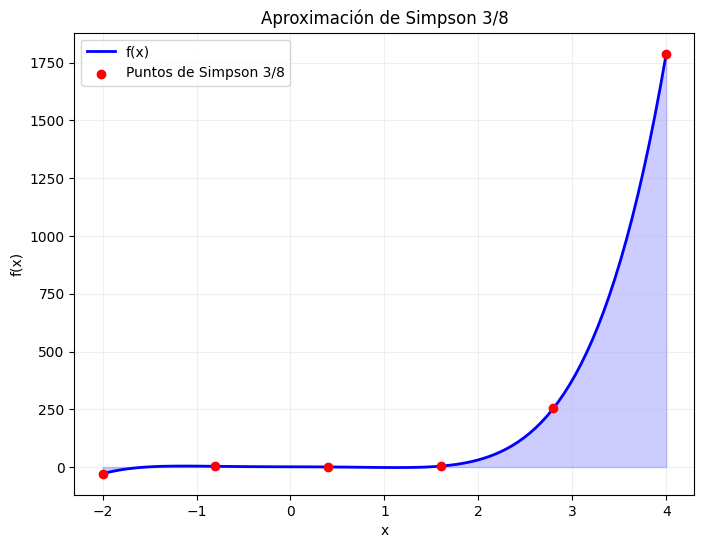

In [15]:
#GRAFICA DE SIMPSON 3/8
f_lambda = sp.lambdify(x, funcion, 'numpy')

x_vals = np.linspace(a, b, 100)
y_vals = f_lambda(x_vals)

h = (b - a) / n
x_approx = np.array([a + i * h for i in range(n+1)])
y_approx = f_lambda(x_approx)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="f(x)", color="blue", linewidth=2)
plt.scatter(x_approx, y_approx, color="red", zorder=5, label="Puntos de Simpson 3/8")
plt.fill_between(x_vals, 0, y_vals, color="blue", alpha=0.2)
plt.title("Aproximación de Simpson 3/8")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(alpha = 0.2)

print("El resultado con el método de Simpson 3/8 es de:", result_simpson_tres_octavos)

plt.show()